In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm as Norm

from os import listdir
from os.path import join

def imread(path):
    return np.array([cv2.imread(join(path, file), cv2.IMREAD_COLOR) for file in sorted(listdir(path))])

def center_crop(img, ratio=0.1):
    h, w = img.shape[:-1]
    h, w = int(h*ratio), int(w*ratio)
    return img[h:-h, w:-w]

def plot_radiance_map(img, center_ratio=0.4):
    gray = np.log(np.average(img, axis=-1, weights=[19, 183, 54]))
    fig, ax = plt.subplots()
    m, M = gray.min(), gray.max()
    pcm = ax.imshow(gray, norm=Norm(vmin=m, vmax=M, vcenter=(m*(1-center_ratio)+M*(center_ratio))), cmap='jet')
    ax.set_title('Radiance Map (in log scale)')
    fig.colorbar(pcm, ax=ax)
    plt.savefig('radiance.png', dpi=300)
    plt.show()

path = './data/new_images3'
shutter_speed = np.array([0.01, 0.02, 0.04, 1/13, 1/6, 1/3, 1, 2, 4, 8], dtype=np.float32)

In [2]:
images = imread(path)
images = np.array([center_crop(x, ratio=0.01) for x in images])

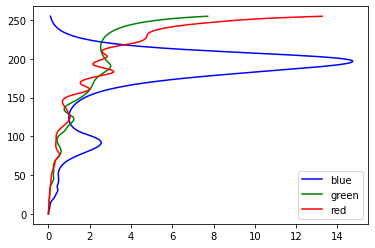

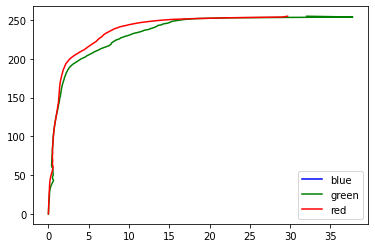

In [5]:
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, shutter_speed.copy()).squeeze()

plt.plot(responseDebevec[:, 0], np.arange(256), 'b', label='blue')
plt.plot(responseDebevec[:, 1], np.arange(256), 'g', label='green')
plt.plot(responseDebevec[:, 2], np.arange(256), 'r', label='red')
plt.legend()
plt.show()

calibrateRobertson = cv2.createCalibrateRobertson()
responseRobertson = calibrateRobertson.process(images, shutter_speed.copy()).squeeze()
plt.plot(responseRobertson[:, 0], np.arange(256), 'b', label='blue')
plt.plot(responseRobertson[:, 1], np.arange(256), 'g', label='green')
plt.plot(responseRobertson[:, 2], np.arange(256), 'r', label='red')
plt.legend()
plt.show()

In [7]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, shutter_speed.copy())

In [32]:
mergeRobertson = cv2.createMergeRobertson()
hdrRobertson = mergeRobertson.process(images, shutter_speed.copy())

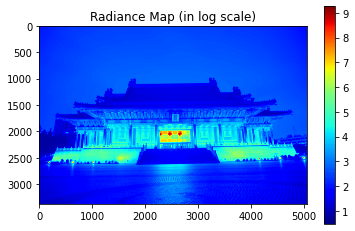

In [42]:
plot_radiance_map(hdrDebevec, center_ratio=0.6)

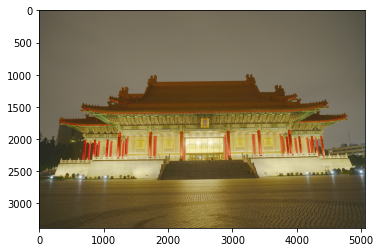

In [66]:
tonemapReinhard = cv2.createTonemapReinhard(1.5, 1, 0.4, 0.5)
ldr = tonemapReinhard.process(hdrDebevec)
cv2.imwrite('cv2reinhard_1-5,1,0-4,0-5.JPG', (ldr*255).astype(np.int))
plt.imshow(ldr[:, :, ::-1])